In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
ms = pd.read_csv('C:/Users/hp/Desktop/Stock_Concepts/CSV/Microsoft_Stock.csv')

In [3]:
ms.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [26]:
ms['Date'].replace('16:00:00', '', regex=True, inplace=True)
ms['Price1'] =  ms['Close'].shift(-1)

In [5]:
ms['PriceDiff'] = ms['Price1']-ms['Close']

In [6]:
ms['Return'] = ms['PriceDiff']/ms['Close']

In [7]:
ms['Direction'] = [1 if ms.loc[i,'PriceDiff']>0 else -1 for i in ms.index]

In [8]:
ms['avgDay3'] = (ms['Close']+ms['Close'].shift(1)+ms['Close'].shift(2))/3

In [27]:
ms.head()

,Date,Open,High,Low,Close,Volume,Price1,PriceDiff,Return,Direction,avgDay3,MA10,MA30,MA50,MA180,Share,Profit,Wealth,LogReturn
0,4/1/2015,40.60,40.76,40.31,40.72,36865322,40.29,-0.43,-0.010560,-1,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,-0.010616
1,4/2/2015,40.66,40.74,40.12,40.29,37487476,41.55,1.26,0.031273,1,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.030794
2,4/6/2015,40.34,41.78,40.18,41.55,39223692,41.53,-0.02,-0.000481,-1,40.853333,NaN,NaN,NaN,NaN,0,0.0,0.0,-0.000481
3,4/7/2015,41.61,41.91,41.31,41.53,28809375,41.42,-0.11,-0.002649,-1,41.123333,NaN,NaN,NaN,NaN,0,0.0,0.0,-0.002652
4,4/8/2015,41.48,41.69,41.04,41.42,24753438,41.48,0.06,0.001449,1,41.500000,NaN,NaN,NaN,NaN,0,0.0,0.0,0.001448


In [10]:
ms['MA10']= ms['Close'].rolling(10).mean()
ms['MA30']= ms['Close'].rolling(30).mean()
ms['MA50']= ms['Close'].rolling(50).mean()
ms['MA180']= ms['Close'].rolling(180).mean()


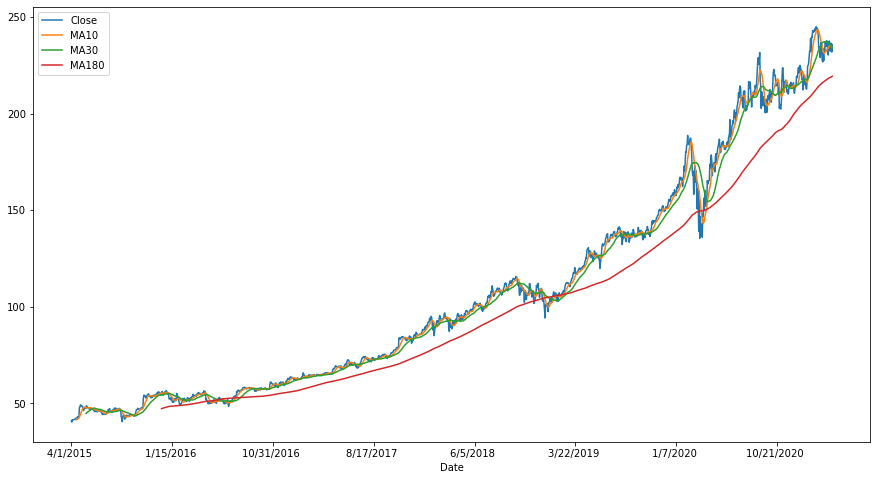

In [28]:
ms.plot(kind='line', x='Date', y='Close', figsize=(15,8))
ms['MA10'].plot()
ms['MA30'].plot()
ms['MA180'].plot()
plt.legend()



# MA10 and MA30 has fast signal whereas MA180 has slow signal

In [12]:
# --SHARE--
ms['Share'] = [1 if ms.loc[i,'MA10']>ms.loc[i,'MA30'] else 0 for i in ms.index]

In [13]:
#--PROFIT--
ms['Profit'] = [ms.loc[i,'Price1']-ms.loc[i,'Close'] if ms.loc[i,'Share']==1 else 0 for i in ms.index]

In [14]:
ms.head()

,Date,Open,High,Low,Close,Volume,Price1,PriceDiff,Return,Direction,avgDay3,MA10,MA30,MA50,MA180,Share,Profit
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322,40.29,-0.43,-0.010560,-1,NaN,NaN,NaN,NaN,NaN,0,0.0
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476,41.55,1.26,0.031273,1,NaN,NaN,NaN,NaN,NaN,0,0.0
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692,41.53,-0.02,-0.000481,-1,40.853333,NaN,NaN,NaN,NaN,0,0.0
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375,41.42,-0.11,-0.002649,-1,41.123333,NaN,NaN,NaN,NaN,0,0.0
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438,41.48,0.06,0.001449,1,41.500000,NaN,NaN,NaN,NaN,0,0.0


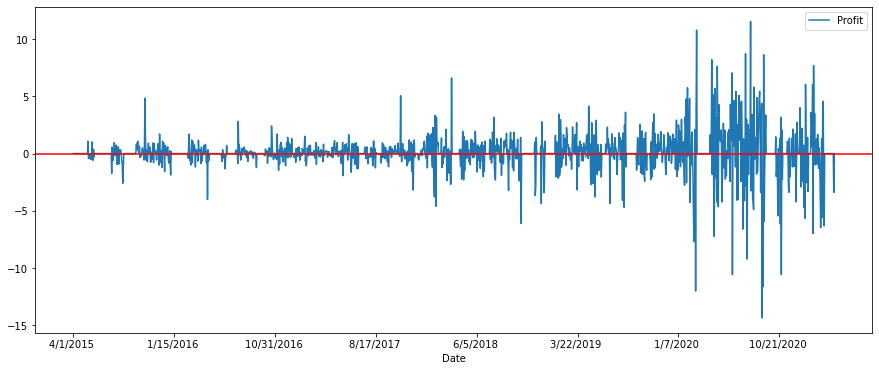

In [29]:
ms.plot(kind='line',x='Date',y='Profit', figsize=(15,6))
plt.axhline(y=0, color='red')

From above, we can see that profit on the positive axis but negative axis shows that we can loss money

In [16]:
# cumsum of profit = wealth
ms['Wealth'] = ms['Profit'].cumsum()


In [17]:
ms.tail()

,Date,Open,High,Low,Close,Volume,Price1,PriceDiff,Return,Direction,avgDay3,MA10,MA30,MA50,MA180,Share,Profit,Wealth
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853,236.48,4.14,0.017819,1,235.126667,234.775,235.367,233.9160,218.749611,0,0.00,89.65
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853,235.24,-1.24,-0.005244,-1,234.760000,234.848,235.100,234.3188,218.872722,0,0.00,89.65
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455,231.85,-3.39,-0.014411,-1,234.686667,234.891,234.775,234.7632,218.992556,1,-3.39,86.26
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012,235.77,3.92,0.016907,1,234.523333,234.305,234.380,235.1472,219.130222,0,0.00,86.26
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471,NaN,NaN,NaN,-1,234.286667,234.178,234.099,235.5338,219.282556,1,NaN,NaN


<AxesSubplot:xlabel='Date'>

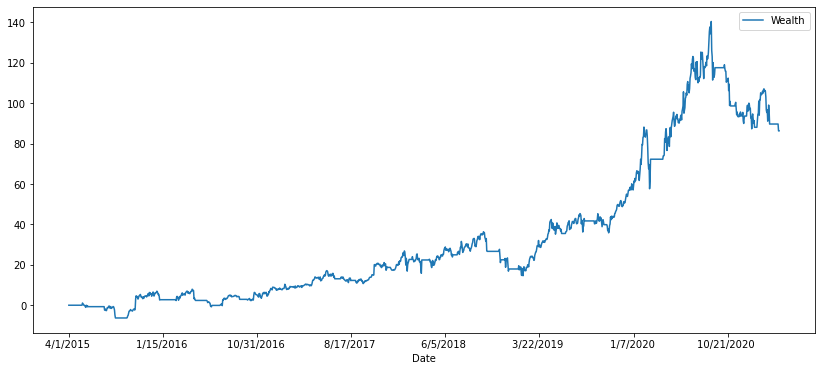

In [30]:
ms.plot(kind='line',x='Date',y='Wealth', figsize=(14,6))

As we can see, wealth is increasing dramatically between 1/7/2020 to 10/21/2020.
Also there is a decreasing pattern of wealth around september/2018 to december/2018.

In [20]:
# let play around with ms data by calculating the log daily return
ms['LogReturn'] = np.log(ms['Close']).shift(-1)-np.log(ms['Close'])

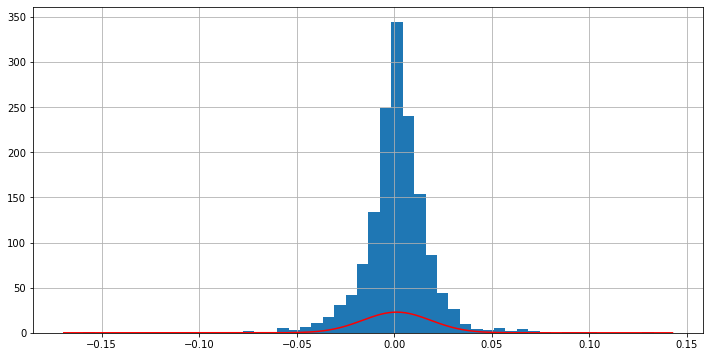

In [21]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 
# You can see it is very close to a normal distribution
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)
density = pd.DataFrame()
density['x']=np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf']=norm.pdf(density['x'], mu,sigma)
ms['LogReturn'].hist(bins=50,figsize=(12,6))
plt.plot(density['x'],density['pdf'], color='red')
plt.show()


# Calculate the probability of the stock price will drop over a certain percentage in a day

In [22]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05,mu,sigma)
print('Probability is :', prob_return1)

Probability is : 0.0016606316482849688


In [23]:
# probability that the stock price of microsoft will drop over 10% in a day
prob_return2 = norm.cdf(-0.10,mu,sigma)
print("Probability is :", prob_return2)

Probability is : 3.2010008121545963e-09


In [24]:
#Drop over 20% in 180days
mu180 = 180*mu
sigma180 = (180**0.5)*sigma
prob_return180 = norm.cdf(-0.20,mu180,sigma180)
print("The probability of dropping over 20% in 180 days is ' :", prob_return180)

The probability of dropping over 20% in 180 days is ' : 0.03996921332351078


# Calculate Value at risk (VaR)

In [25]:
# Value at risk(VaR)
VaR = norm.ppf(0.05,mu,sigma)
print('Single Day Value at risk ', VaR)

Single Day Value at risk  -0.027497194097679072
